# 군집

## 소개

특성만 알고 있는 상황에서는 훈련과 모델 평가에 필요한 타깃 데이터가 없이 때문에 지도학습을 사용할 수 없으므로 비지도 학습으로 해결해야 한다.

비지도 학습 중 하나인 `군집`<sup>clustering</sup> 알고리즘의 목적은 샘플에 잠재되어 있는 그룹을 식별하는 것이고 그룹이 성공적으로 구분된다면 타깃 벡터가 없이도 샘플의 클래스를 예측할 수 있다.

## k-평균을 사용한 군집

`k-평균 군집`은 가장 널리 사용하는 군집 알고리즘 중 하나로 작동 방식은 아래와 같다.

1. k개의 클러스터 `중심` 포인트를 랜덤한 위치에 만든다.

2. 각 샘플에 대해 각 샘플과 k개의 중심 포인트 사이 거리를 계산하고 가장 가까운 `중심` 포인트에 할당한다.

3. `중심` 포인트를 클러스터의 평균 위치로 이동시킨다.

4. 클러스터에 할당되는 샘플에 변화가 없을 때까지 2~3을 반복한다.

![Alt text](figs/19_01.png)

In [34]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=3, random_state=0, n_init='auto')
model.fit(X_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

클러스터 k의 수를 지정하는 `n_clusters`가 가장 중요한 매개변수이다.

예제에서는 세개의 클래스로 이미 알려진 붓꽃 데이터를 사용했으므로 k=3으로 설정했지만 일반적으로는 클러스터의 개수를 알기 어려운데 이 경우에는 별도의 기준을 바탕으로 k값을 선택한다.

대표적으로 `실루엣 계수`를 이용하는 방법과 엘보우<sup>elbow</sup> 방법이 있다.

`실루엣 계수`는 클러스터 간의 유사성 대비 클러스터 내의 유사성을 측정해 클러스터의 개수를 결정한다.

![Alt text](figs/19_02.png)




In [35]:
# 예측 클래스를 확인

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [36]:
# 실제 클래스를 확인 (결과가 상당히 좋다?)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
# 새로운 샘플을 생성하고 예측

new_observation = [[0.8, 0.8, 0.8, 0.8]]

model.predict(new_observation)

array([2])

In [38]:
# 중심 포인트를 확인

model.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.01139555, -0.87600831,  0.37707573,  0.31115341],
       [ 1.16743407,  0.14530299,  1.00302557,  1.0300019 ]])

In [39]:
# 샘플과 클러스터 중심까지의 거리 합인 inertia를 확인

model.inertia_

140.03275277428654

In [40]:
# score 메서드에서 반환하는 값이 inertia로 좋을 수록 값이 커야 하기 때문에 음수로 변환

model.score(X_scaled)

-140.03275277428648

In [41]:
# 샘플 데이터를 각 클러스터까지의 거리로 변환
# 4차원 공간 특성이 3차원 특성 공간으로 변환됨

model.transform(new_observation)

array([[3.45674596, 1.97109171, 0.81102172]])

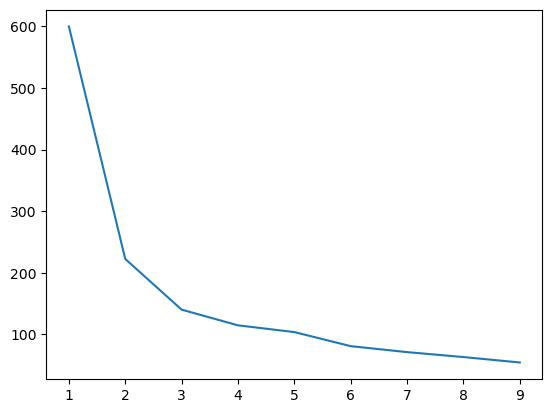

In [42]:


# 적절한 n_clusters를 찾기 위해 inertia가 가장 크게 변하는 지점(elbow point)을 찾는다.
# 결과를 보면 n_clusters가 2 또는 3일 때 inertia가 가장 크게 변한다.

import matplotlib.pyplot as plt

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto")
    inertia.append(kmeans.fit(X_scaled).inertia_)

plt.plot(range(1, 10), inertia)
plt.show()

## k-평균 군집 속도 향상하기

`미니배치 k-평균`은 성능을 조금 희생해서 속도를 비약적으로 향상시킨 군집 알고리즘이며 주요 매개변수인 `batch_size`를 사용해 각 반복에서 일부 샘플만 사용하며 사이즈가 클 수록 계산비용이 많이 필요하다.

훈련 세트가 너무 클 경우 `partial_fit` 메서드를 사용해 점진적으로 학습할 수 있다.

```python
mb_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=20)

for i in range(3):
    mb_kmeans.partial_fit(features_std[i*50:(i+1)*50])
```


In [47]:
%%time

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100, n_init='auto')
model.fit(X_scaled)

CPU times: total: 46.9 ms
Wall time: 58 ms


MiniBatchKMeans(batch_size=100, n_clusters=3, n_init='auto', random_state=0)

## 평균이동을 사용한 군집

`k-평균 군집`의 단점 중 하나가 클러스터의 개수를 지정해야 한다는 것인데 이런 제약이 없는 알고리즘이 `평균이동 군집`이다.

> 안개가 많이 낀 축구장에 100명의 사람이 있다면 그들은 짧은 거리만 볼 수 있으므로 가장 가까운 사람을 찾아 그룹을 만들게 된다. 그룹의 중심은 그룹의 멤버들의 평균 위치이다. 그리고 그들이 보이지 않는 다른 그룹들도 같은 방식으로 형성된다.
>
> 이 과정을 계속 반복하면 그들은 점점 더 큰 그룹으로 모이게 되고 결국 안개가 사라지면 하나의 그룹으로 모인다.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190429212410/370.png" width="500"/>

Surface plot: 

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190429214435/gd3.png" width="500"/>

Contour plot: 

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190508162515/anigif.gif" width="500"/>

출처 : [https://www.geeksforgeeks.org/ml-mean-shift-clustering/](https://www.geeksforgeeks.org/ml-mean-shift-clustering/)

In [48]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = MeanShift(n_jobs=-1)
model.fit(X_scaled)

MeanShift(n_jobs=-1)

In [49]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
model.cluster_centers_

array([[ 0.50161528, -0.32287436,  0.65393539,  0.65261739],
       [-1.05954571,  0.75811468, -1.2998088 , -1.25401594]])

## DBSCAN을 사용한 군집

`DBSCAN`<sup>Density-based spatial clustering of applications with noise</sup>은 많은 샘플이 밀집된 영역을 클러스터로 간주하므로 클러스터의 개수를 미리 정하지 않아도 되고 클러스터 모양에 제약이 없으므로 복잡한 모양의 클러스터를 찾을 수 있다.

<img src="https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F2d14eda3-3f11-4b34-9d46-c90651462317%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA_2022-05-05_%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE_10.02.15.png&blockId=84d0146b-4750-4fb6-a9ae-9bfdef1209d3" width="500"/>

이 알고리즘의 처리방식은 다음과 같다.

랜덤한 샘플 하나를 선택하고 `eps` 거리 안에 있는 모든 샘플을 찾는다. 이웃이 `min_samples`보다 적으면 이 샘플은 `이상치`<sup>outlier</sup>이고 이웃이 `min_samples`보다 많으면 이 샘플은 `핵심 샘플`이다. 가까운 샘플과 그 샘플에 가까운 샘플에 대해 재귀적으로 반복하고 반복이 끝나면 새로운 랜덤 샘플을 선택해 같은 과정을 반복한다.

> `eps`: 가까운 샘플을 정의하기 위한 최대 거리
> 
> `min_samples`: 샘플이 핵심 샘플이 되기 위해 필요한 eps 내에 있는 이웃의 수

<img style="background-color:white;" src="https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fd7921f84-1e30-4d87-ad47-e6f43ee2c337%2FUnSupervised3_1.png&blockId=99f80cd5-0fe6-40cc-acf4-c0ed65f2a5fe" width="300" />

In [53]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = DBSCAN(n_jobs=-1)
model.fit(X_scaled)

DBSCAN(n_jobs=-1)

In [54]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [55]:
# 핵심 샘플의 인덱스 확인

model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147], dtype=int64)

In [56]:
# 알고리즘 특성상 새로운 데이터에 대한 예측은 할 수 없으며 fit_predict 메서드를 사용해야 한다.

model.fit_predict(X_scaled)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

## 계층적 병합을 사용한 군집

`계층적 병합 군집`<sup>hierarchical agglomerative clustering</sup>은 모든 샘플이 각자 하나의 클러스터로 시작 해 조건에 부합하는 클러스터가 서로 병합되며 종료 조건에 도달 할 때 까지 이 과정을 반복한다.

AgglomerativeClustering 클래스는 `linkage` 매개변수를 사용해 클러스터 사이의 거리를 측정한다.

- `ward`: 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 병합한다.
- `complete`: 클러스터 포인트 사이의 최대 거리가 최소가 되도록 클러스터를 합친다.
- `average`: 클러스터 포인트 사이의 평균 거리가 최소가 되도록 클러스터를 합친다.
- `single`: 클러스터 포인트 사이의 최소 거리가 최소가 되도록 클러스터를 합친다.

다른 매개 변수 중 `affinity` 매개 변수는 linkage 매개 변수에 따라 거리를 측정하는 방식을 지정한다. 기본값은 `euclidean`이다.
`n_clusters` 매개변수는 클러스터의 개수를 지정한다.

In [57]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X_scaled)

AgglomerativeClustering(n_clusters=3)

In [28]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# DBSCAN과 마찬가지로 fit_predict 메서드를 사용해야 한다.

model.fit_predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)